# Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions
**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
**Destination** - The planet the passenger will be debarking to.
**Age** - The age of the passenger.
**VIP** - Whether the passenger has paid for special VIP service during the voyage.
`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
**Name** - The first and last names of the passenger.
**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.
`PassengerId` - `Id` for each passenger in the test set.
`Transported` - The target. For each passenger, predict either True or False.

### Planning

I am going to trying out various ML algorithms using [lazypredict](https://lazypredict.readthedocs.io/en/latest/usage.html#classification) and find the best algorithm and fine tune it
- fine tune the best performing model with grid search cv  

Approaching problem using Deep learning
- ANN (hypertune)

- Find best performing algorithm from ML and DL and submit the results

Imports required libs/modules

In [121]:
import opendatasets as od
import pandas as pd
import os

## 1. Download the Dataset
- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas
Dataset link: [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data)

Download Data from Kaggle
We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library

In [122]:
dataset_url = 'https://www.kaggle.com/competitions/spaceship-titanic/data'
data_dir = './spaceship-titanic'
if not os.path.exists(data_dir):
    od.download(dataset_url)

## Loading Training Set and Test Set

In [123]:
spaceship_titanic_df = pd.read_csv(f'{data_dir}/train.csv')
spaceship_titanic_test_df = pd.read_csv(f'{data_dir}/test.csv')

In [124]:
spaceship_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [125]:
spaceship_titanic_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Exploratory Data Analysis

In [126]:
import plotly.express as px
import matplotlib.pyplot as plt

In [127]:
spaceship_titanic_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Data

#### Finding missing values

In [128]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [129]:
train_missing_data = spaceship_titanic_df.isna().sum().sort_values()
train_missing_data

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [130]:
test_missing_data = spaceship_titanic_test_df.isna().sum().sort_values()

In [131]:
fig = make_subplots(
    rows=1,
    cols=2,
    column_titles=["Train Data", "Test Data"],
    x_title="Missing Values"
)
fig.add_trace(go.Bar(x=train_missing_data, y=train_missing_data.index, orientation='h'), 1, 1)
fig.add_trace(go.Bar(x=test_missing_data, y=test_missing_data.index, orientation='h'), 1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

Observations:
- Both training and testing dataset are having missing values
- In Train data - CryoSleep has highest missing values(217) where as in Test data FoodCourt has highest missing values (106)
- Same as, in Train data - Age has lowest missing values(179) where as in Test data FoodCourt has lowest missing values (80)

#### Features Informations

In [132]:
spaceship_titanic_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Observations:
- Continous features 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
- Categorical features 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'
- Qualitative features 'PassengerId', 'Cabin' ,'Name'

we will handle/preprocess this features on the basis of their category

### Age

In [133]:
spaceship_titanic_df.Age.unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

ploting transported passangers with age

In [134]:
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)

In [135]:
def hist_plot(x: str, df: pd.DataFrame = spaceship_titanic_df, hue: str = 'Transported', kde: bool = True) -> None:
    sns.histplot(data=df, x=x, hue=hue, kde=kde, binwidth=1)
    plt.title(f'{x} distribution')
    plt.xlabel(f'{x}')

In [136]:
plt.figure(figsize=(15, 5))
hist_plot(x='Age')
# sns.histplot(data=spaceship_titanic_df, x='Age', hue='Transported', kde=True, binwidth=1)
# plt.title('Age distribution')
# plt.xlabel('Age (years)')

Observations:
* age range 0-79
* most of the passangers are in the age of 18-38 (young)
* Age between 0 - 18 are mostly likely to transported
* Age between 20-45 less likely to transported


### Categorical features 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'

In [137]:
spaceship_titanic_df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [138]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [139]:
fig = plt.figure(figsize=(15, 30))
for i, feature_name in enumerate(cat_features):
    # Left side
    ax = fig.add_subplot(4, 2, 2 * i + 1)
    sns.countplot(data=spaceship_titanic_df, x=feature_name, axes=ax, hue='Transported', width=0.5)
    ax.set_title(f'{feature_name} Train')

    # Right Side
    ax = fig.add_subplot(4, 2, 2 * i + 2)
    sns.countplot(data=spaceship_titanic_test_df, x=feature_name, axes=ax, width=0.5)
    ax.set_title(f'{feature_name} Test')
fig.tight_layout()

Observations:
+ HomePlanet
  * 3 Destinations - Europa, Eath, Mars
  * Highest passangers are transported to Europa
  * Least passangers are transported to Earth for some reason

* VIP Test does not seem to be useful feature

### Expenditure features 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [140]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig = plt.figure(figsize=(10, 20))
for i, feature_name in enumerate(exp_feats):
    # Left side
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=spaceship_titanic_df, x=feature_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(feature_name)

    # Right side
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(data=spaceship_titanic_df, x=feature_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0, 100])
    ax.set_title(feature_name)
fig.tight_layout()




Observations:
* It seems most people do not spend money
* we can concider these features as luxury

### Transported

Target distribution

In [141]:
spaceship_titanic_df.Transported.value_counts().plot.pie(
    explode=[0.1, 0.1],
    autopct='%1.1f%%',
    shadow=True,
).set_title('Target Distribution')  # type: ignore

Text(0.5, 1.0, 'Target Distribution')

let's check features correlation with target

Lets check feature correlations

In [142]:
corr_matrix = spaceship_titanic_df.corr(numeric_only=True)

In [143]:
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot: >

In [144]:
sns.heatmap(corr_matrix[['Transported']].sort_values(by='Transported', ascending=False), annot=True)

<AxesSubplot: >

Observations:
* As we noticed, passangers who use luxury features are not likely to do be transported, here we can see that 
  those luxuries features are inversely proportional to target 

## Preprocessing

### Handle Missing Values

In [145]:
spaceship_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [146]:
spaceship_titanic_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [147]:
num_log_attribs = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
num_attribs = ["Age"]
cat_attribs = ["HomePlanet", "CryoSleep", "Cabin", "Destination"]

In [148]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

scaler = StandardScaler()
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')
onehot_encoder = OneHotEncoder(
    drop='if_binary',
    handle_unknown='ignore',
    sparse=False
)

In [149]:
num_xformer = Pipeline(
    steps=[
        ('imputer_mean', imputer_mean),
        ('scaler', scaler)
    ]
)

The logarithm transform  is used to decrease skew in distributions, espcially with large outlier.\
It makes easier for algorithms to learn the correct relationships. 

In [150]:
# https://stats.stackexchange.com/a/506322
import numpy as np


def log_transform(x):
    return np.log(x + 1)

In [151]:
log_xformer = FunctionTransformer(log_transform)
log_xformer = Pipeline(
    steps=[
        ('imputer_mean', imputer_mean),
        ('log', log_xformer),
        ('scaler', scaler),
    ]
)

In [152]:
cat_xformer = Pipeline(
    steps=[
        ('imputer_mode', imputer_mode),
        ('onehot_encoder', onehot_encoder)
    ]
)

In [153]:
preprocerssor = ColumnTransformer(
    transformers=[
        ('num', num_xformer, num_attribs),
        ('log_attr', log_xformer, num_log_attribs),
        ('cat', cat_xformer, cat_attribs)
    ],
)

In [154]:
X = spaceship_titanic_df.drop(labels=['Transported'], axis=1)
y = spaceship_titanic_df.Transported

In [155]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [156]:
X_preprocessed = preprocerssor.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [157]:
X_test_preprocessed = preprocerssor.transform(spaceship_titanic_test_df)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:182: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



## Preparing data for model

In [158]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [159]:
X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=42
                                                      )

In [160]:
X_train

array([[-0.05774287, -0.67035216,  0.66759839, ...,  0.        ,
         0.        ,  1.        ],
       [-0.82492266, -0.67035216,  1.69473514, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05774287, -0.67035216, -0.68296189, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.47620457,  1.16823704, -0.68296189, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36071884,  1.48426238, -0.68296189, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05774287,  0.08390134,  1.39534543, ...,  1.        ,
         0.        ,  0.        ]])

## Model Building

In [161]:
def predict_and_submit(model, fname, test_df):
    test_preds = model.predict(test_df)
    sub_df = pd.read_csv(data_dir + '/sample_submission.csv')
    sub_df['Transported'] = test_preds
    sub_df.to_csv(f'{fname}.csv', index=None)
    return sub_df

In [162]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [163]:
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_clf.fit(X_train, X_valid, y_train, y_valid)

100%|██████████| 29/29 [10:53<00:00, 22.55s/it]


In [164]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.78,0.78,0.78,8.24
LGBMClassifier,0.78,0.78,0.78,0.78,1.35
BaggingClassifier,0.78,0.78,0.78,0.78,5.63
AdaBoostClassifier,0.78,0.78,0.78,0.78,15.92
ExtraTreesClassifier,0.78,0.78,0.78,0.78,15.54
XGBClassifier,0.78,0.78,0.78,0.78,9.97
DecisionTreeClassifier,0.77,0.77,0.77,0.77,1.42
BernoulliNB,0.75,0.75,0.75,0.75,0.97
CalibratedClassifierCV,0.75,0.75,0.75,0.75,171.05


LGBMClassifier is winner with less time taken. so we can try to fine-tune it

### Fine tune LGBMClassifier

In [165]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_drid = {
    'n_estimators': np.arange(100, 1000, 100),
    'boosting_type': ['gbdt'],
    'max_depth': [-1],
    'num_leaves': np.arange(2, 50, 3)
}

In [166]:
lgbm_model = LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

In [167]:
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_drid,
    scoring='accuracy',
    verbose=10,
    cv=5
)

In [168]:
grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 1/5; 1/144] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=0.769 total time=   0.2s
[CV 2/5; 1/144] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 2/5; 1/144] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=0.784 total time=   0.1s
[CV 3/5; 1/144] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 3/5; 1/144] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=0.768 total time=   0.1s
[CV 4/5; 1/144] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 4/5; 1/144] END boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2;, score=0.778 total time=   0.1s
[CV 5/5; 1/144] START boosting_type=gbdt, max_depth=-1, n_estimators=100, num_leaves=2
[CV 5/5; 1/144] END boosting_t

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'boosting_type': ['gbdt'], 'max_depth': [-1],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'num_leaves': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47])},
             scoring='accuracy', verbose=10)

In [169]:
grid_search_lgbm.best_score_

0.8001169905197336

In [170]:
grid_search_lgbm.best_params_

{'boosting_type': 'gbdt',
 'max_depth': -1,
 'n_estimators': 100,
 'num_leaves': 5}

In [171]:
lgbm_grid_search_cv = grid_search_lgbm.best_estimator_

In [172]:
predict_and_submit(lgbm_grid_search_cv, 'grid_search_lgbm_submission', X_test_preprocessed)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


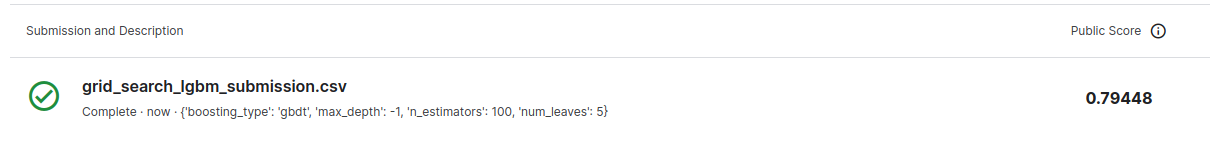

## Let's try with ANN

In [173]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import keras_tuner as kt

In [174]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()


def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=4, max_value=512)
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    model = keras.Sequential()
    for _ in range(n_hidden):
        model.add(layers.Dense(
            n_neurons, kernel_initializer="he_normal",
            activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [175]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=30,
    overwrite=True,
    directory="RandomSearch",
    project_name="my_rnd_search",
    seed=42
)

In [176]:
random_search_tuner.search(X_train, y_train, epochs=30,
                           validation_data=(X_valid, y_valid))

Trial 30 Complete [00h 00m 18s]
accuracy: 0.7450388073921204

Best accuracy So Far: 0.9068162441253662
Total elapsed time: 00h 08m 04s
INFO:tensorflow:Oracle triggered exit


In [177]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [178]:
best_model.evaluate(X_valid, y_valid)  # [0.5498157739639282, 0.7809085845947266]

55/55 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.7826


[0.6342213153839111, 0.7826337218284607]

In [179]:
preds = best_model.predict(X_valid)
preds[preds <= 0.5] = 0
preds[preds > 0] = 1

55/55 [==============================] - 0s 771us/step


In [180]:
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [181]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values
#{'n_hidden': 7, 'n_neurons': 282, 'learning_rate': 0.010981101687758642}

{'n_hidden': 7, 'n_neurons': 282, 'learning_rate': 0.010981101687758642}

In [182]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 7
n_neurons: 282
learning_rate: 0.010981101687758642
Score: 0.9068162441253662


In [184]:
best_trial.metrics.get_last_value("accuracy")

0.9068162441253662

In [ ]:
0.7826337218284607

In [200]:
import numpy as np


def predict_and_submit_ann(model, fname, test_df):
    test_preds = model.predict(test_df)
    test_preds[test_preds <= 0.5] = 0
    test_preds[test_preds > 0] = 1

    # replace 0, 1 to True and False
    preds = np.where(test_preds == 1, 'True', 'False')
    sub_df = pd.read_csv(data_dir + '/sample_submission.csv')

    sub_df['Transported'] = preds
    sub_df.to_csv(f'{fname}.csv', index=None)
    return sub_df

In [201]:
predict_and_submit_ann(best_model, 'random_search_tuner_ann_submission', X_test_preprocessed)

134/134 [==============================] - 0s 738us/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


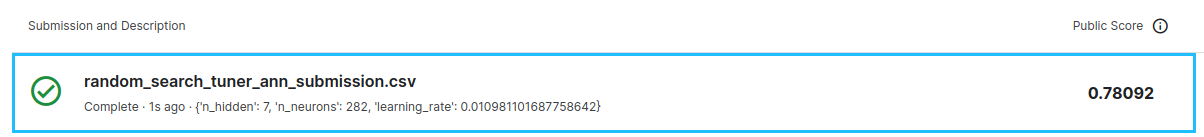

ANN is not performing better than classic ML algorithms

## Reference

* https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide
* https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models